# tomo\_challenge bonus analysis

_Alex I. Malz (GCCL@RUB)_

In [1]:
import corner
import h5py
import sys

In [9]:
import matplotlib as mpl
# print(mpl.rcParams.items)
mpl.use('Agg')
mpl.rcParams['text.usetex'] = False
# mpl.rcParams['mathtext.rm'] = 'serif'
# mpl.rcParams['font.family'] = 'serif'
# mpl.rcParams['font.serif'] = ['Times New Roman']
mpl.rcParams['font.family'] = ['serif']
mpl.rcParams['axes.titlesize'] = 25
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['xtick.labelsize'] = 15
mpl.rcParams['ytick.labelsize'] = 15
mpl.rcParams['savefig.dpi'] = 250
mpl.rcParams['figure.dpi'] = 250
mpl.rcParams['savefig.format'] = 'pdf'
mpl.rcParams['savefig.bbox'] = 'tight'
mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['xtick.minor.size'] = 5
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.major.size'] = 10
mpl.rcParams['ytick.minor.size'] = 5
mpl.rcParams['ytick.direction'] = 'in'

import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
# import make_figures
from make_figures import *

toppath = '/global/cfs/cdirs/lsst/groups/WL/users/zuntz/tomo_challenge_data/results_data/'

My ideas for plots are a meta-metric (like Figs. 5 and 8 from [the old qp paper](https://iopscience.iop.org/article/10.3847/1538-3881/aac6b5)), a rank-based plot across test conditions (some simplification of Francois' plots, perhaps like Figs. 5 and 6 from [the PLAsTiCC metrics paper](https://iopscience.iop.org/article/10.3847/1538-3881/ab3a2f)), and a visualization of an information metric for n(z) (maybe a bit like Fig. 12 from [the PLAsTiCC results paper](https://arxiv.org/pdf/2012.12392), but maybe something else entirely), the last of which would be important to support the claim about the impact of a reduction in filters that's currently justified only by eye from Fig. 3. 

# n(z) overlap

like Fig. 12 from [the PLAsTiCC results paper](https://arxiv.org/pdf/2012.12392), code adapted from [proclam](https://github.com/aimalz/proclam/blob/master/results_paper/disagreement.ipynb)

TODO: calculate the scalarized overlap metric values for all available outputs and plot those

Moar files here:

`buzzard_bins/UTOPIA_9_ugrizy_0.npy`

`buzzard_bins/funbins_9_ugrizy_0.npy`

`buzzard_metrics/UTOPIA_9_ugrizy_0.npy.yml`

`buzzard_metrics/funbins_9_ugrizy_0.npy.yml`

`dc2_bins/UTOPIA_9_ugrizy_0.npy`

`dc2_metrics/UTOPIA_9_ugrizy_0.npy.yml`

In [11]:
funbins_ugrizy = np.load(toppath+'dc2_bins/funbins_9_ugrizy_0.npy')

In [12]:
truth_dc2 = h5py.File(toppath+'dc2_testing.hdf5', 'r')

In [13]:
totgal = len(truth_dc2['redshift_true'][:])

0.04830864298461816 changed bin
0.1475183691177714 changed bin


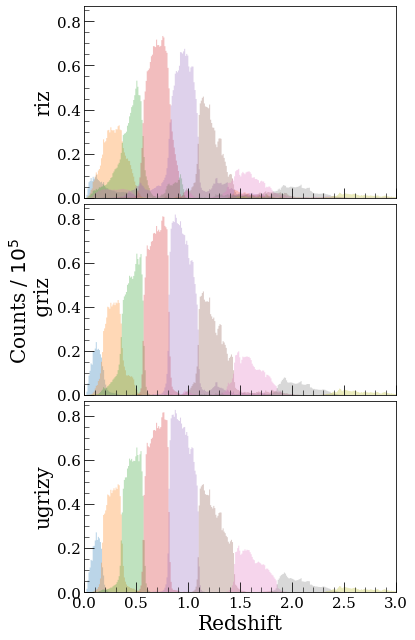

In [22]:
def plot_funbins_nz(filename, riz_fn, griz_fn, ugrizy_fn, true_zs):
    riz_file = riz_fn#"./cosmodc2/bins/funbins_9_riz_0.npy"
    griz_file = griz_fn#"./cosmodc2/bins/funbins_9_griz_0.npy"
    ugrizy_file = ugrizy_fn#"./cosmodc2/bins/funbins_ugrizy.npy"
#     z_file = "./cosmodc2/bins/z.npz"


    if not os.path.exists(riz_file):
        print("Data not downloaded for n(z) plot - not overwriting")
        return

    fig, ax = plt.subplots(3, 1, figsize=(6, 9), sharex=True, sharey=True)
    colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

    riz = np.load(riz_file)
    griz = np.load(griz_file)
    ugrizy = np.load(ugrizy_file)
    z = true_zs#np.load(z_file)['arr_0']
    
    print(str(len((ugrizy - griz)[ugrizy - griz > 0])/len(ugrizy))+' changed bin')
    print(str(len((ugrizy - riz)[ugrizy - riz > 0])/len(ugrizy))+' changed bin')

    nbin = 9

    outinfo = {}
    sharebins = np.arange(0., 3.01, 0.01)
    outinfo['riz'] = []
    for i in range(nbin):
        w = np.where(riz == i)
        weight = np.repeat(1e-5, w[0].size)
        ax[0].hist(z[w], bins=sharebins, histtype='stepfilled', alpha=0.3, ls='-', color=colors[i], weights=weight, lw=1)
#         ax[0].set_title('riz')
        outinfo['riz'].append(z[w])
    outinfo['griz'] = []
    for i in range(nbin):
        w = np.where(griz == i)
        weight = np.repeat(1e-5, w[0].size)
        ax[1].hist(z[w], bins=sharebins, histtype='stepfilled', alpha=0.3, ls='-', color=colors[i], weights=weight, lw=1)
#         ax[1].set_title('griz')
        outinfo['griz'].append(z[w])
    outinfo['ugrizy'] = []
    for i in range(nbin):
        w = np.where(ugrizy == i)
        weight = np.repeat(1e-5, w[0].size)
        ax[2].hist(z[w], bins=sharebins, histtype='stepfilled', alpha=0.3, ls='-', color=colors[i], weights=weight, lw=1)
#         ax[2].set_title('ugrizy')
        outinfo['ugrizy'].append(z[w])
    ax[0].set_ylabel('riz')
    ax[1].set_ylabel('Counts / $10^5$ \n griz')
    ax[2].set_ylabel('ugrizy')
    ax[2].set_xlabel('Redshift')
    ax[0].set_xlim(0, 3)
    plt.minorticks_on()
    fig.tight_layout()
    fig.subplots_adjust(hspace=0.03)
    fig.savefig(filename)
    plt.show()
    plt.close(fig)
    return(outinfo)
    
classified_redshifts = plot_funbins_nz('nzbinned_dc2_funbins.pdf', toppath+'dc2_bins/funbins_9_riz_0.npy', toppath+'dc2_bins/funbins_9_griz_0.npy', toppath+'dc2_bins/funbins_9_ugrizy_0.npy', truth_dc2['redshift_true'][:])

In [8]:
sharebins = np.arange(0., 3.01, 0.001)
binned_redshifts = {}
for key in classified_redshifts.keys():
    binned_redshifts[key] = []
    for v in classified_redshifts[key]:
        binned_redshifts[key].append(np.histogram(v, bins=sharebins))

In [9]:
def diff_meas(key, ref_bin_no, comp_bin_no):
    overlap = 0
    for grid_ind, hist_val in enumerate(binned_redshifts[key][ref_bin_no][0]):
        overlap += min(hist_val, binned_redshifts[key][comp_bin_no][0][grid_ind])
    return overlap / totgal

In [10]:
all_overlaps = {}
for i, key in enumerate(binned_redshifts.keys()):
#     for j in range(3)[i+1:]:
#         comp_key = list(binned_redshifts.keys())[j]
    all_overlaps[key] = np.zeros((9, 9))
    for ref_bin_no in range(9):
        for comp_bin_no in range(ref_bin_no):#(9):
            metric = diff_meas(key, ref_bin_no, comp_bin_no)
            all_overlaps[key][ref_bin_no][comp_bin_no] = metric

In [11]:
# for i, key in enumerate(all_overlaps.keys()):
#     print(key, np.sum(all_overlaps[key]))

/global/homes/z/zuntz/.conda/envs/jaz-gpu/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


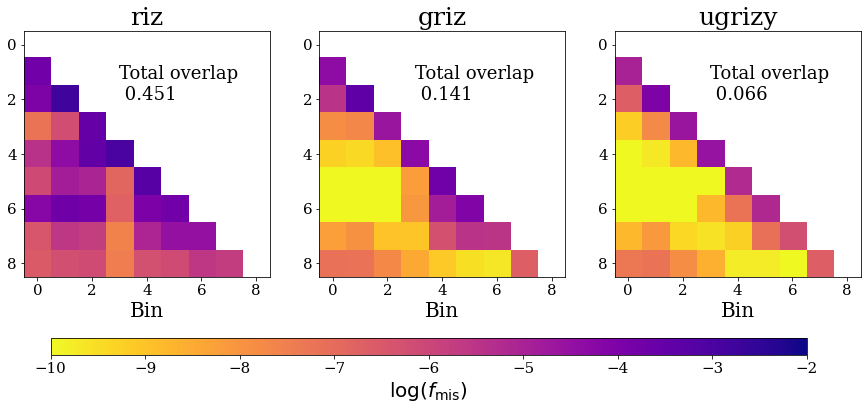

In [51]:
colMap = plt.cm.plasma_r
fig = plt.figure(figsize=(15, 6))
# heights = [5, 1, 1]
grid = fig.add_gridspec(ncols=3, nrows=1)
# fig.suptitle('funbins DC2 cross-bin n(z) log-overlap measure')
for i, key in enumerate(binned_redshifts.keys()):
    ax = fig.add_subplot(grid[0, i])
    img = ax.imshow(np.log(all_overlaps[key]), cmap=colMap, vmin=-10, vmax=-2)
    ax.set_title(key)
    total_overlap_frac = np.sum(all_overlaps[key])
    ax.text(3, 2, f"Total overlap\n {total_overlap_frac:.3f}", fontsize=18)
    ax.set_xlabel('Bin')

    
fig.subplots_adjust(bottom=0.05)
cbar_ax = fig.add_axes([0.15, 0.0, 0.7, 0.04])
# ax=fig.add_subplot(grid[2, :])
fig.colorbar(img, cax=cbar_ax, label=r"$\log{(f_\mathrm{mis})}$", orientation='horizontal')

# fig.tight_layout()
fig.subplots_adjust(hspace=0.0)
plt.savefig('nzoverlap_dc2_funbins.pdf')

# cross-metric comparison plot

TODO: triangularize this, include ratio of n(z) overlap metrics? just one overlap metric?

In [19]:
def load_table(base):
    N = np.array([3, 5, 7, 9])
    data = []
    for name in method_names:
        for i, bands in enumerate(['riz', 'griz']):
            for n in N:
                row = [name, bands, n]
                fn = base+'/metrics/'+name+'_'+str(n)+'_'+bands+'_0.npy.yml'#r"{base}/metrics/{name}_{n}_{bands}_0.npy.yml"
                try:
                    info =  yaml.safe_load(open(fn))
                except:
                    info = EverythingIsZero()
                for metric in  metrics:
                    row.append(info[metric])
                data.append(row)
    results = Table(rows=data, names=["method", "bands", "bins"] + metrics, dtype=['U100', 'U4', 'i4'] + ['f8']*(len(metrics)))
    return results

# dc2 = load_table('cosmodc2')
# buzzard = load_table('buzzard')

TODO: Next, replace this with my own cornerplot that doesn't try to smooth the distribution. Then, plot one line as function of nbins per method per dataset per bands. Then use color, shape, linestyle to distinguish bands, dataset, nbins.

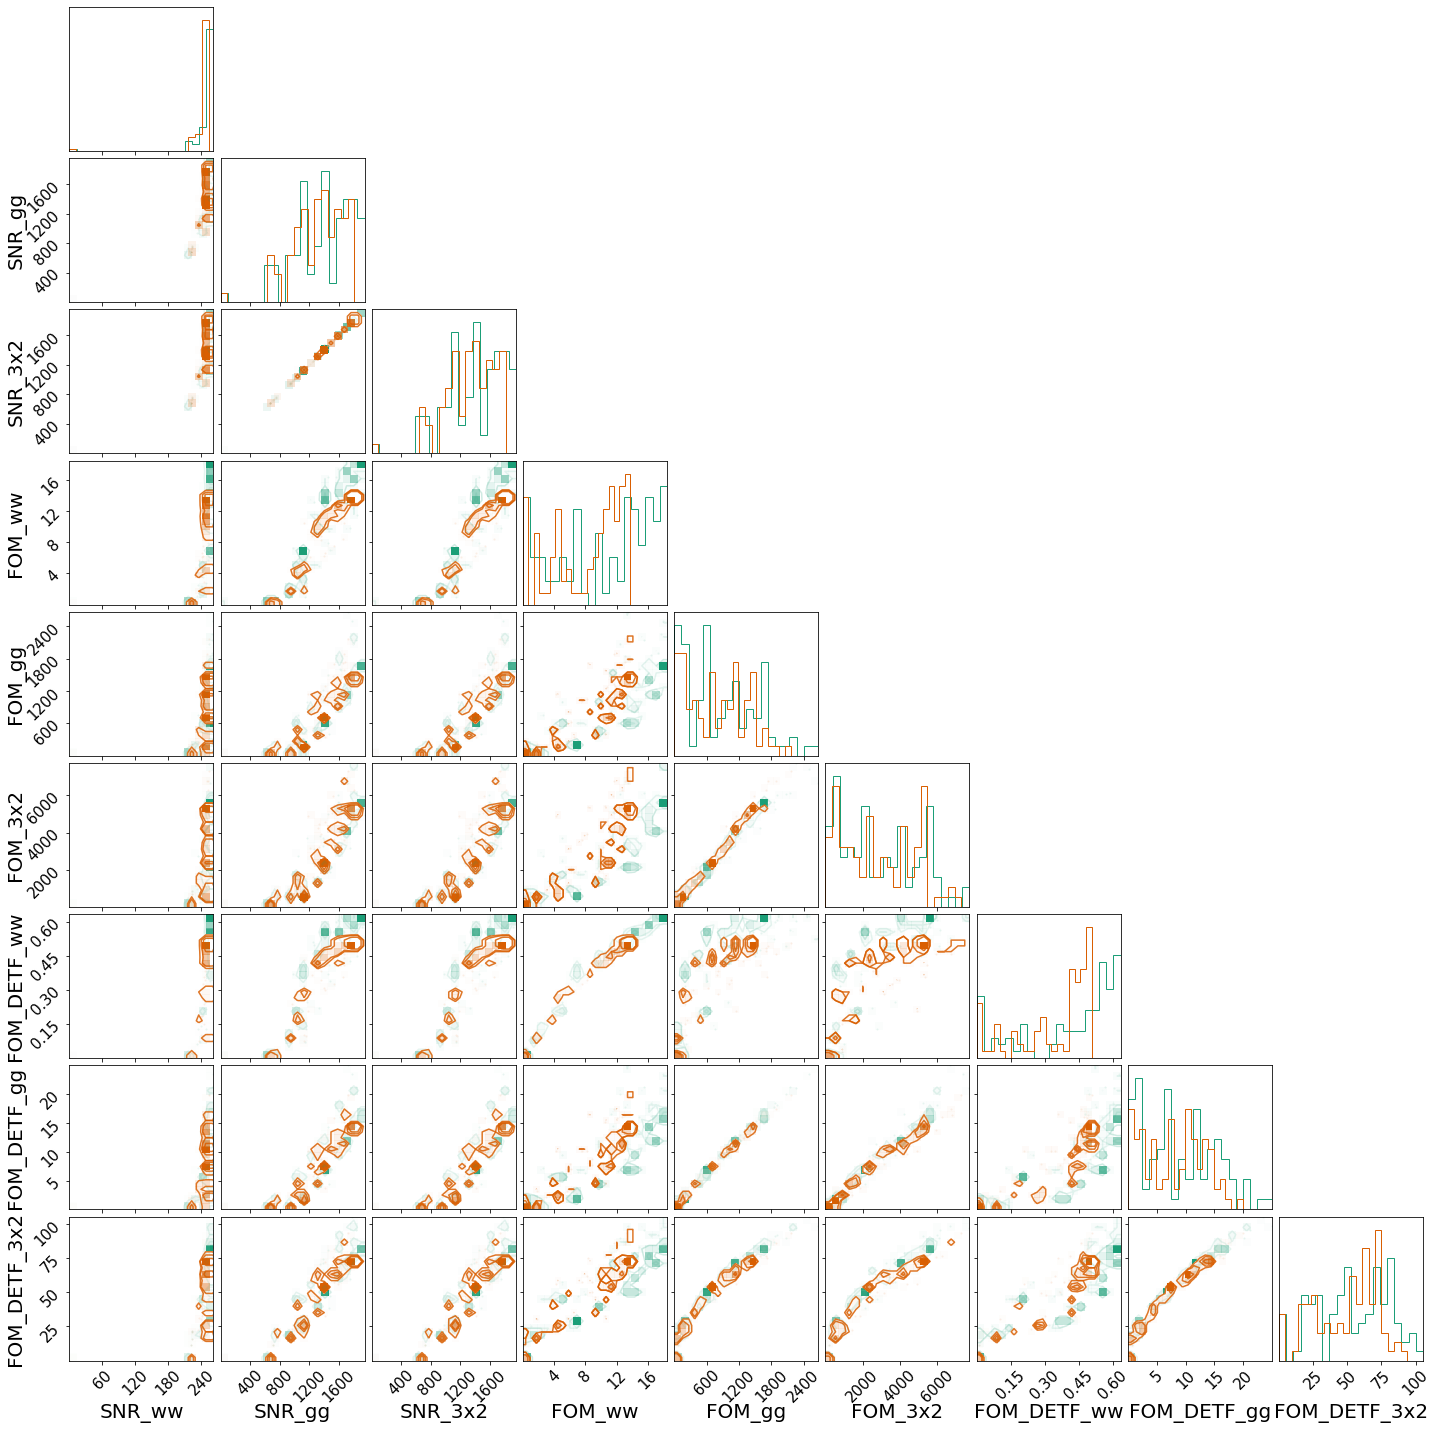

In [21]:
# need to replace this with my own scatter/corner plot
# can nominally plot line over nbins for each method --> have linestyle, shape, color to work with for nbins, bands, dataset

metcols = ['SNR_ww','SNR_gg','SNR_3x2','FOM_ww','FOM_gg','FOM_3x2','FOM_DETF_ww','FOM_DETF_gg','FOM_DETF_3x2']
# shapes = {'cosmodc2': 'o', 'buzzard': 'v'}
# bands = {'riz': 'v', 'griz': 's'}
cmap = matplotlib.cm.Dark2
# labels = ['err_u', 'err_g', 'err_r', 'err_i', 'err_z', 'err_y']

def plot_corner(which_data, dimname):
    data = load_table(which_data)
    dimopts = np.unique(data[dimname])
    subsets = data.group_by(dimname)
    for i, val in enumerate(dimopts):
        plotdata = subsets.groups[i][metcols].to_pandas().dropna()
        if i == 0:
            fig = corner.corner(plotdata, 
                            labels=metcols, alpha=0.5, color=cmap.colors[i])
        else:
            corner.corner(plotdata, fig=fig, color=cmap.colors[i], alpha=0.5)
            
plot_corner('buzzard', 'bands')

# rank evolution with test conditions

(like Figs. 5 and 6 from [the PLAsTiCC metrics paper](https://iopscience.iop.org/article/10.3847/1538-3881/ab3a2f))

TODO: use bisect to convert to rank by each metric

In [ ]:
# # from https://github.com/aimalz/proclam/blob/master/Plot_Table3.ipynb

# metric_dictionary = {'TBDT':{'FoM': 1, 'LogLoss': 1, 'Brier': 1},
#                      'TKNN':{'FoM': 7, 'LogLoss': 6, 'Brier': 7},
#                      'TNB':{'FoM': 8, 'LogLoss': 9, 'Brier': 8},
#                      'TNN':{'FoM': 5, 'LogLoss': 3, 'Brier': 3},
#                      'TSVM':{'FoM': 3, 'LogLoss': 2, 'Brier': 2},
#                      'WBDT':{'FoM': 2, 'LogLoss': 5, 'Brier': 4},
#                      'WKNN':{'FoM': 9, 'LogLoss': 8, 'Brier': 9},
#                      'WNB':{'FoM': 10, 'LogLoss': 10, 'Brier': 10},
#                      'WNN':{'FoM': 6, 'LogLoss': 7, 'Brier': 6},
#                      'WSVM':{'FoM': 4, 'LogLoss': 4, 'Brier': 5},
#                     }

# def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
#     new_cmap = mpl.colors.LinearSegmentedColormap.from_list(
#         'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
#         cmap(np.linspace(minval, maxval, n)))
#     return new_cmap

# cmap = plt.get_cmap('hot_r')
# fave_cmap = truncate_colormap(cmap, 0.35, 1.0)

# colors = {'TBDT':fave_cmap(0.05),
#            'TKNN':fave_cmap(0.2375),
#            'TNB':fave_cmap(0.54),
#            'TNN':fave_cmap(0.712499999),
#            'TSVM':fave_cmap(1.0),
#            'WBDT':fave_cmap(0.05),
#            'WKNN':fave_cmap(0.2375),
#            'WNB':fave_cmap(0.54),
#            'WNN':fave_cmap(0.712499999),
#            'WSVM':fave_cmap(1.0),
#           }

# plt.figure()
# for key, value in metric_dictionary.items():
#     val = []
#     for k, v in value.items():
#         val.append(v)
#     if 'W' in key:
#         plt.plot(val, label=key, marker=symbols[key], ls='--', color=colors[key], lw=2, ms=7, alpha=0.3)
#     else:
#         plt.plot(val, label=key, marker=symbols[key], color=colors[key], lw=2, ms=7)

# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 12})
# plt.xticks([0, 1, 2], ['FoM', 'LogLoss', 'Brier'])
# plt.yticks(np.arange(1, 11))
# plt.ylabel('Rank')
# plt.gca().invert_yaxis()

# #plt.savefig('Tables3_option4.pdf')

# meta-metric

(like Figs. 5 and 8 from [the old qp paper](https://iopscience.iop.org/article/10.3847/1538-3881/aac6b5))

sensitivity of metrics to the different dimensions of (DC2 vs. Buzzard) X (3 vs. 5 vs. 7 vs. 9 bins) X (algorithm)

In [ ]:
# # from https://github.com/aimalz/qp/blob/master/docs/desc-0000-qp-photo-z_approximation/research/analysis.ipynb

# def plot_pz_delta_moments(name, size):
#     n_gals_use = size
#     extremum = np.zeros(n_moments_use)
    
#     path = os.path.join(name, str(size))
#     loc = os.path.join(path, 'pz_moment_deltas'+str(size)+name)
#     with open(loc+'.hkl', 'r') as pz_file:
#         pz_stats = hickle.load(pz_file)
#     flat_floats = np.array(pz_stats['N_f']).flatten()
#     in_x = np.log(flat_floats)
#     a = 1./len(formats)
#     shapes = moment_shapes
#     marksize = 10
    
#     def make_patch_spines_invisible(ax):
#         ax.set_frame_on(True)
#         ax.patch.set_visible(False)
#         for sp in ax.spines.values():
#             sp.set_visible(False)   
            
#     fig, ax = plt.subplots()
#     fig.subplots_adjust(right=1.)
#     ax_n = ax
#     for key in formats:
#         ax.plot([-10], [0], color=colors[key], label=key, linestyle=styles[key], alpha=0.5, linewidth=2)
#     for n in range(1, n_moments_use):
#         ax.scatter([-10], [0], color='k', alpha=0.5, marker=shapes[n], s=50, label=moment_names[n])
#         n_factor = 0.1 * (n - 2)
#         if n>1:
#             ax_n = ax.twinx()
#             rot_ang = 270
#             label_space = 15.
#         else:
#             rot_ang = 90
#             label_space = 0.
#         if n>2:
#             ax_n.spines["right"].set_position(("axes", 1. + 0.1 * (n-1)))
#             make_patch_spines_invisible(ax_n)
#             ax_n.spines["right"].set_visible(True)
#         for s in range(len(formats)):
#             f = formats[s]
#             f_factor = 0.05 * (s - 1)
#             old_shape = np.shape(np.array(pz_stats[f][n]))
#             new_shape = (old_shape[0], np.prod(old_shape[1:]))
#             data_arr = np.abs(np.array(pz_stats[f][n]).reshape(new_shape)) * 100.#go from n_floats*instantiations*n_gals n_floats*(n_gals*n_instantiations)
#             std = np.log10(np.percentile(data_arr, [25, 50, 75], axis=-1))
#             y_plus = std[-1]#mean + std
#             y_minus = std[0]#mean - std
#             mean = std[1]
#             ax_n.plot(np.exp(in_x+n_factor), mean, linestyle=styles[f], marker=shapes[n], mfc='none', markersize=marksize, alpha=a, color=colors[f])
#             ax_n.vlines(np.exp(in_x+n_factor), y_minus, y_plus, linewidth=3., alpha=a, color=colors[f])
#             n_delta_max[n] = max(n_delta_max[n], np.max(y_plus))
#             n_delta_min[n] = min(n_delta_min[n], np.min(y_minus))
#         ax_n.set_ylabel(r'$\log_{10}$-percent error on '+moment_names[n], rotation=rot_ang, fontsize=14, labelpad=label_space)
#         extremum[n] = np.max(np.abs(np.array([n_delta_min[n], n_delta_max[n]]))) + 0.25
#         ax_n.set_ylim(-1.*extremum[n], extremum[n])
#     ax.set_xscale('log')
#     ax.set_xticks(flat_floats)
#     ax.get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
#     ax.set_xlim(np.exp(min(in_x)-0.25), np.exp(max(in_x)+0.25))
#     ax.set_xlabel('number of parameters', fontsize=14)
#     ax.set_title(dataset_info[name]['name']+r' data $\hat{p}(z)$ moment log-percent errors', fontsize=16)
#     ax.legend(loc=dataset_info[name]['legloc_p'])
#     fig.tight_layout()
#     fig.savefig(loc+'_clean.pdf', dpi=250)
#     plt.close()
            
#     fig, ax = plt.subplots()
#     fig.subplots_adjust(right=1.)
#     ax_n = ax
#     for key in formats:
#         ax_n.plot([-10], [0], color=colors[key], label=key, linestyle=styles[key], alpha=0.5, linewidth=2)
#     for n in range(1, n_moments_use):
#         n_factor = 0.1 * (n - 2)
#         ax.scatter([-10], [0], color='k', alpha=a, marker=shapes[n], s=50, label=moment_names[n])
#         if n>1:
#             ax_n = ax.twinx()
#             rot_ang = 270
#             label_space = 15.
#         else:
#             rot_ang = 90
#             label_space = 0.
#         if n>2:
#             ax_n.spines["right"].set_position(("axes", 1. + 0.1 * (n-1)))
#             make_patch_spines_invisible(ax_n)
#             ax_n.spines["right"].set_visible(True)
#         for s in range(len(formats)):
#             f = formats[s]
#             f_factor = 0.05 * (s - 1)
#             data_arr = np.swapaxes(np.array(pz_stats[f][n]), 0, 1)
#             data_arr = np.median(data_arr, axis=2) * 100.
#             for i in data_arr:
#                 ax_n.plot(np.exp(in_x+n_factor), i, linestyle=styles[f], marker=shapes[n], mfc='none', markersize=marksize, color=colors[f], alpha=a)
#         ax_n.set_ylabel(r'median percent error on '+moment_names[n], rotation=rot_ang, fontsize=14, labelpad=label_space)
#         ax_n.set_ylim(-10., 10.)#(-1.*extremum[n], extremum[n])
#     ax.set_xscale('log')
#     ax.set_xticks(flat_floats)
#     ax.get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
#     ax.set_xlim(np.exp(min(in_x)-0.25), np.exp(max(in_x)+0.25))
#     ax.set_xlabel('number of parameters', fontsize=14)
#     ax.set_title(dataset_info[name]['name']+r' data $\hat{p}(z)$ moment percent errors', fontsize=16)
#     ax.legend(loc='upper left')
#     fig.tight_layout()
#     fig.savefig(loc+'_all.pdf', dpi=250)
#     plt.close()